In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [14]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


In [15]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [16]:
# Reshape the data to fit the model input
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [17]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [18]:
# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Validation data shape: {x_val.shape}, Validation labels shape: {y_val.shape}")

Validation data shape: (12000, 28, 28, 1), Validation labels shape: (12000, 10)


In [19]:
# Define the first model (Dense Neural Network - No Convolutions)
def create_model1():
    model = Sequential(name="Dense_Network")
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the second model (CNN)
def create_model2():
    model = Sequential(name="CNN_Model")
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the models
model1 = create_model1()
model2 = create_model2()

# Summarize the models
print("Model 1 Summary:")
model1.summary()
print("\nModel 2 Summary:")
model2.summary()

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model 1 Summary:


Model: "Dense_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Model 2 Summary:


Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Dictionary to store training histories
histories = {}

# Train the first model
print("\nTraining Model 1...")
histories['model1'] = model1.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

# Train the second model
print("\nTraining Model 2...")
histories['model2'] = model2.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)


Training Model 1...
Epoch 1/15
Epoch 1/15
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5945 - loss: 1.1288 - val_accuracy: 0.8173 - val_loss: 0.4936
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5945 - loss: 1.1288 - val_accuracy: 0.8173 - val_loss: 0.4936
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5945 - loss: 1.1288 - val_accuracy: 0.8173 - val_loss: 0.4936
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7840 - loss: 0.6037 - val_accuracy: 0.8405 - val_loss: 0.4346
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7840 - loss: 0.6037 - val_accuracy: 0.8405 - val_loss: 0.4346
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7840 - loss: 0.6037 - val_accuracy: 0.8405 - val_loss: 0.4346
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8077 - loss: 0.5419 - val_accuracy: 0.8380 - val_loss: 0.4289
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5m

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.3718
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.3718
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.3718
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9078 - loss: 0.2716
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9078 - loss: 0.2716
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9078 - loss: 0.2716
Model 1 - Test loss: 0.3797, Test accuracy: 0.8630
Model 2 - Test loss: 0.2632, Test accuracy: 0.9090
Model 1 - Test loss: 0.3797, Test accuracy: 0.8630
Model 2 - Test loss: 0.2632, Test accuracy: 0.9090
Model 1 - Test loss: 0.3797, Test accuracy: 0.8630
Model 2 - Test loss: 0.2632, Test accuracy: 0.9090


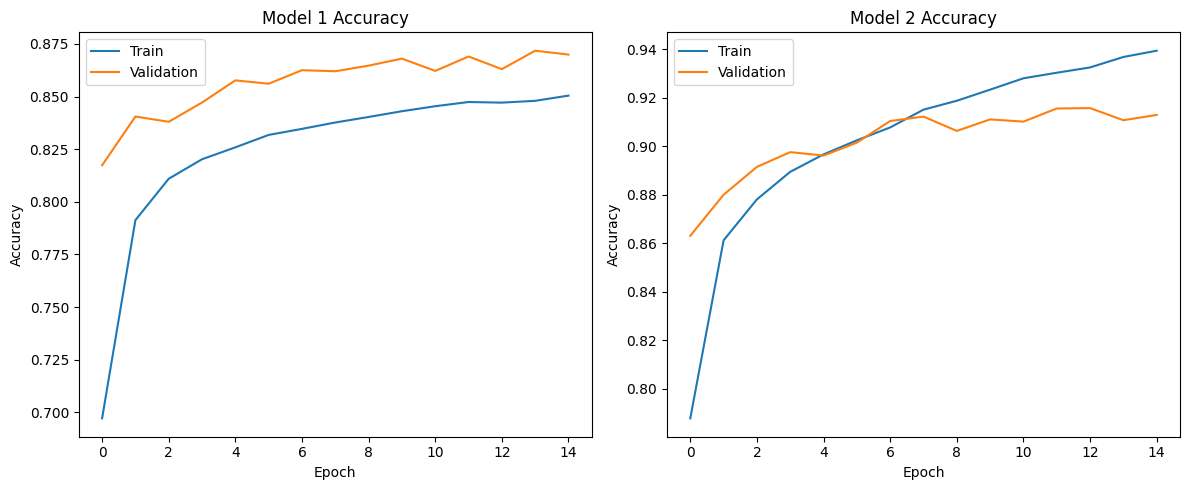

In [21]:
# Evaluate the models on the test set
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)

print(f"Model 1 - Test loss: {test_loss1:.4f}, Test accuracy: {test_acc1:.4f}")
print(f"Model 2 - Test loss: {test_loss2:.4f}, Test accuracy: {test_acc2:.4f}")

# Compare the accuracy of both models
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(histories['model1'].history['accuracy'], label='Train')
plt.plot(histories['model1'].history['val_accuracy'], label='Validation')
plt.title('Model 1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(histories['model2'].history['accuracy'], label='Train')
plt.plot(histories['model2'].history['val_accuracy'], label='Validation')
plt.title('Model 2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Best model: Model 2 (CNN) with accuracy: 0.9090
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


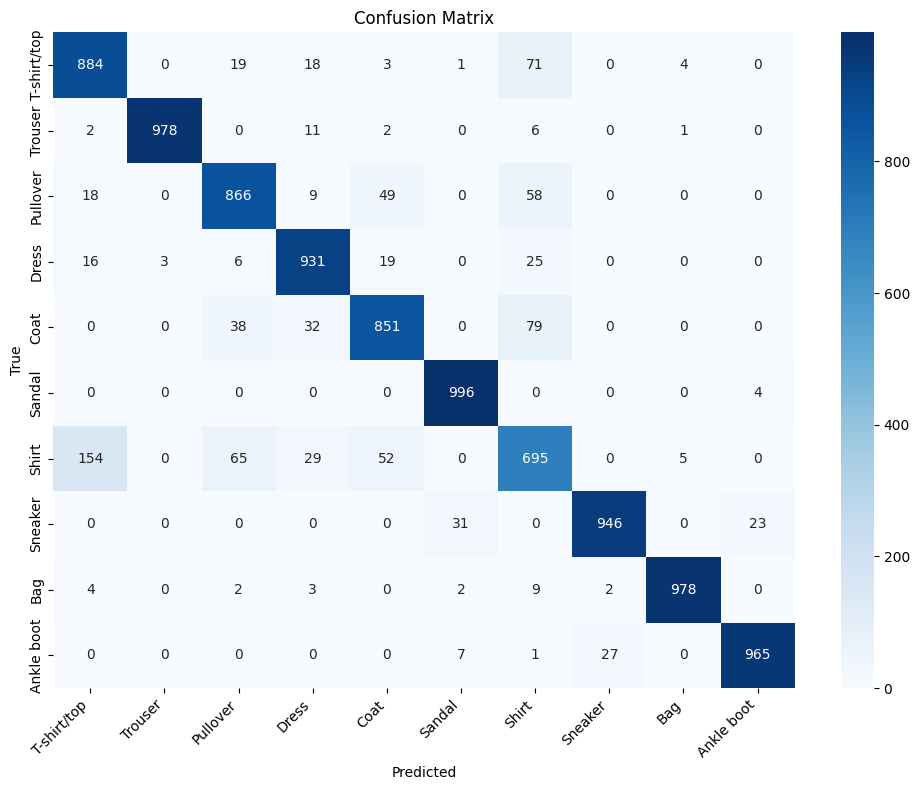


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.88      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.87      0.87      1000
       Dress       0.90      0.93      0.92      1000
        Coat       0.87      0.85      0.86      1000
      Sandal       0.96      1.00      0.98      1000
       Shirt       0.74      0.69      0.72      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



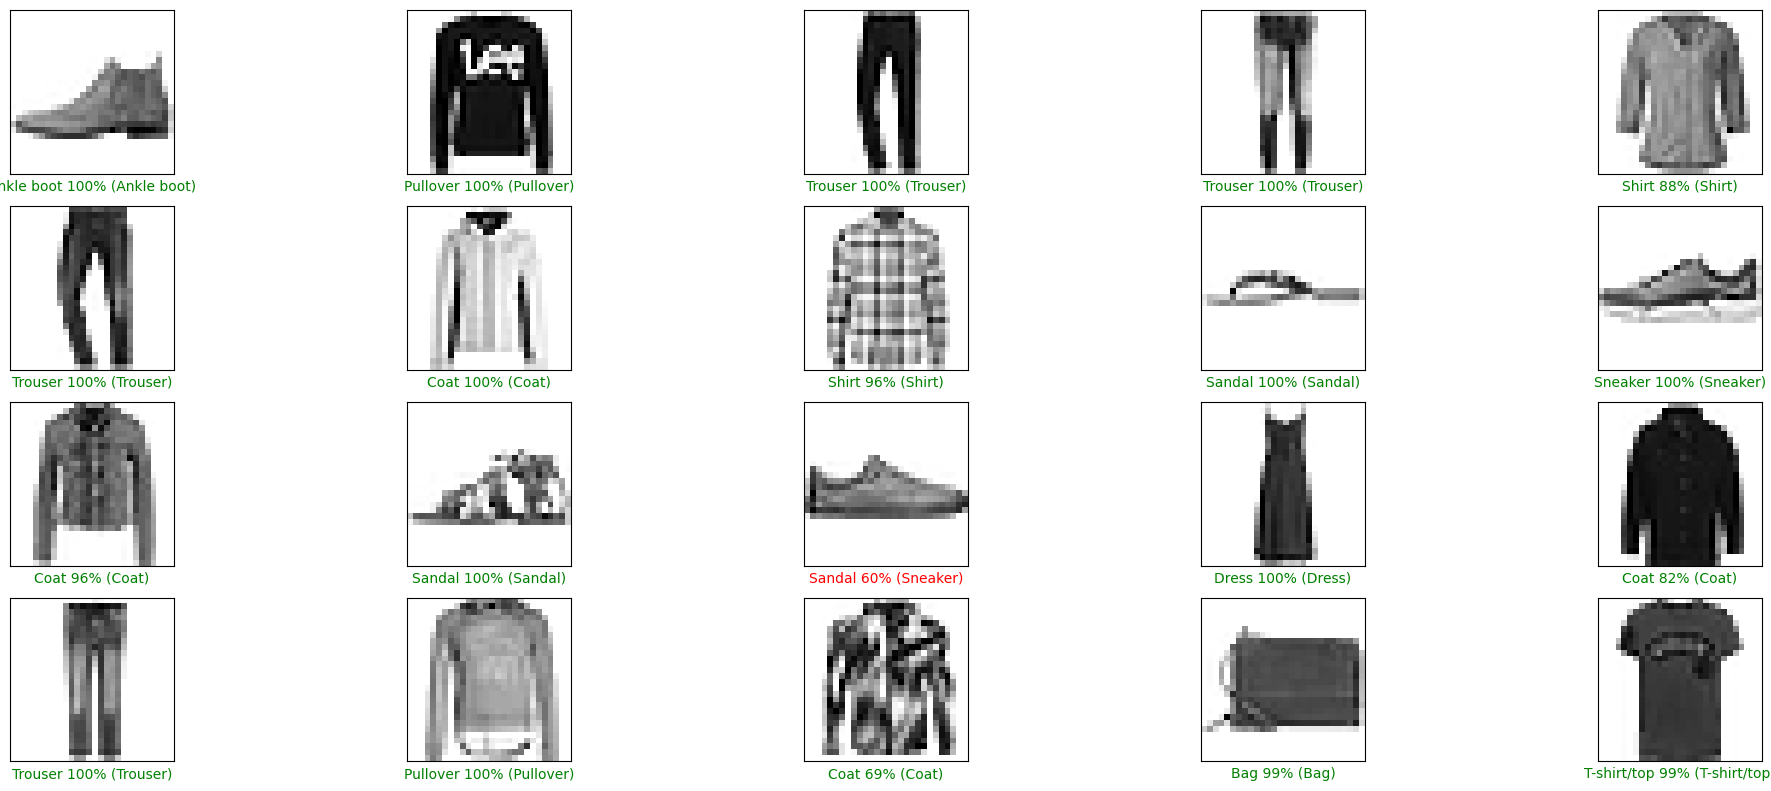

In [22]:
# Determine the best model
best_model = model1 if test_acc1 > test_acc2 else model2
best_model_name = "Model 1 (Dense Network)" if test_acc1 > test_acc2 else "Model 2 (CNN)"
print(f"\nBest model: {best_model_name} with accuracy: {max(test_acc1, test_acc2):.4f}")

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions with the best model
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, 
           yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Display some example predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array[i]),
        class_names[true_label]),
        color=color)

# Plot a grid of predictions
num_rows = 4
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_pred, y_true, x_test)
plt.tight_layout()
plt.show()